In [26]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [27]:
df = pd.read_csv("train.csv")

y_train = df['label']
y_train =  keras.utils.to_categorical(y_train, 10)
x_train = df.drop(['label'], axis = 1)
x_train = x_train.to_numpy()
x_train_re = x_train.reshape(len(x_train),28,28,1) / 255

In [28]:
(x_train_2, y_train_2), (x_test_2, y_test_2) = keras.datasets.mnist.load_data()
x_train_2 = x_train_2.reshape(60000, 28, 28, 1) / 255
x_test_2 = x_test_2.reshape(10000,28,28,1)/255
y_train_2 = keras.utils.to_categorical(y_train_2, 10)
y_test_2 = keras.utils.to_categorical(y_test_2 , 10)



In [29]:
tot_x_train = np.concatenate((x_train_re, x_train_2), axis = 0)
tot_y_train = np.concatenate((y_train,  y_train_2), axis = 0)

In [43]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3),
activation="relu", input_shape=(28, 28, 1)))
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
activation="relu"))

model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(rate=0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation="relu"))

model.add(keras.layers.Dense(10, activation="softmax"))
model.add(keras.layers.Dropout(rate=0.05))
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adadelta(learning_rate=10),
metrics='accuracy')

In [44]:
history = model.fit(tot_x_train, tot_y_train, batch_size=512, epochs=15, verbose=1, validation_split=0.2)

Epoch 1/15
160/160 [==============================] - 55s 343ms/step - loss: 1.1744 - accuracy: 0.8325 - val_loss: 0.1175 - val_accuracy: 0.9617
Epoch 2/15
160/160 [==============================] - 56s 351ms/step - loss: 0.8555 - accuracy: 0.9330 - val_loss: 0.0538 - val_accuracy: 0.9827
Epoch 3/15
160/160 [==============================] - 56s 352ms/step - loss: 0.8496 - accuracy: 0.9376 - val_loss: 0.0717 - val_accuracy: 0.9776
Epoch 4/15
160/160 [==============================] - 55s 346ms/step - loss: 0.8209 - accuracy: 0.9432 - val_loss: 0.0253 - val_accuracy: 0.9926
Epoch 5/15
160/160 [==============================] - 51s 318ms/step - loss: 0.8384 - accuracy: 0.9435 - val_loss: 0.0353 - val_accuracy: 0.9899
Epoch 6/15
160/160 [==============================] - 51s 317ms/step - loss: 0.8081 - accuracy: 0.9463 - val_loss: 0.0230 - val_accuracy: 0.9943
Epoch 7/15
160/160 [==============================] - 51s 319ms/step - loss: 0.8093 - accuracy: 0.9468 - val_loss: 0.0248 - val_ac

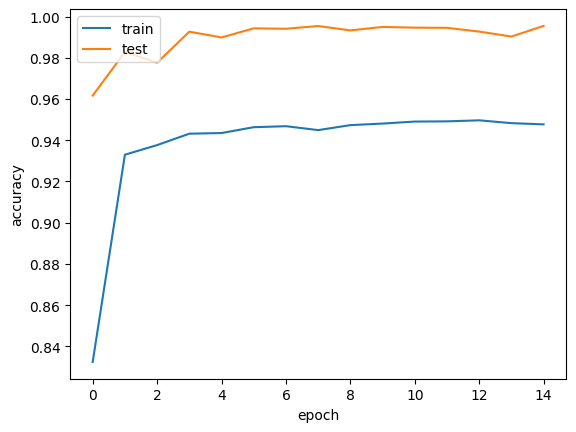

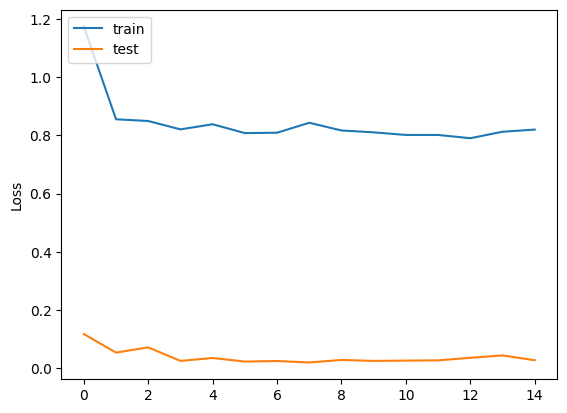

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [46]:
df_test = pd.read_csv("test.csv")
x_test = df_test.to_numpy()

In [47]:
x_test = x_test.reshape(len(x_test), 28, 28, 1) / 255

In [48]:
predict = model.predict(x_test)
predict = np.argmax(predict, axis= 1)
index = range(1, len(predict)+1)



In [49]:

outcome = pd.DataFrame({'ImageId': index , 'Label':predict})
outcome = outcome.set_index('ImageId')
print(outcome)
outcome.to_csv("predictions.csv")

         Label
ImageId       
1            2
2            0
3            9
4            9
5            3
...        ...
27996        9
27997        7
27998        3
27999        9
28000        2

[28000 rows x 1 columns]
